In [1]:
from pathlib import Path
import sys
import pandas as pd
import numpy as np
from IPython.display import display

OUTPUT_DIR = Path.cwd() / "output"       

OUTPUT_DIR.mkdir(exist_ok=True)


NA_VALUES = ["---", "--", "", " ", "NA", "N/A"]
# =========================
# FILE FINDER
# =========================
def find_file(name, start=Path.cwd()):
    for ancestor in [start] + list(start.parents):
        matches = list(ancestor.rglob(name))
        if matches:
            return matches[0]
    return None


def find_files(file_map):
    found = {}
    for key, filename in file_map.items():
        path = find_file(filename)
        if path:
            found[key] = path
        else:
            print(f"[WARNING] File not found: {filename}")
    return found

eda_script_path = find_file("script_eda.py")
if eda_script_path is None:
    raise FileNotFoundError("❌ script_eda.py tidak ditemukan di parent directory")

# tambahkan BASE PROJECT ke sys.path
sys.path.append(str(eda_script_path.parent))

# sekarang bisa import
from script_eda import evaluate_dataset, extract_column_schema,find_internal_duplicate_columns,extract_single_schema,cek_value_data_column




In [2]:
payh_kualitas_air = find_file("data-kualitas-air-sungai-komponen-data.csv")

if payh_kualitas_air is None:
    raise FileNotFoundError("❌ File merged tidak ditemukan")

df_kualitas_air = pd.read_csv(payh_kualitas_air, na_values=NA_VALUES)
"""
evaluate_dataset(
    df_kualitas_air,
    name="Jumlah Penduduk",
    unique=["periode_data","tahun","nama_provinsi","nama_kabupaten_kota","nama_kecamatan","nama_kelurahan","usia","jenis_kelamin"]
)
"""
extract_single_schema(df_kualitas_air)
print("Total rows:", df_kualitas_air.shape[0])
print("Total columns:", df_kualitas_air.shape[1])

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)

unique_df = cek_value_data_column(
    df_kualitas_air,
    exception=["hasil_pengukuran"],
    return_df=True
)






Total rows: 14400
Total columns: 12
📋 UNIQUE VALUE REPORT (WIDE FORMAT)
Total columns : 11
Max rows      : 157


,periode_data,periode_pemantauan,bulan_sampling,titik_sampel,nama_sungai,alamat,latitude,longitude,jenis_parameter,parameter,baku_mutu
0,2024.0,Periode 2,5.0,KLT 3,Kalibaru Timur,Jl. Raya Bogor Komseko,-6.286182,106.870626,Kimia,pH,6.900
1,NaN,Periode 3,8.0,KLT 6,Pesanggrahan,Jl. Bunga Matraman Jatinegara,-6.211244,106.861962,Biologi,BOD,3.000
2,NaN,Periode 1,2.0,PSG 4,Sepak,Jl. H Kelik Hutan Kota,-6.208616,106.764814,Fisika,COD,25.000
3,NaN,Periode 4,10.0,KLT 4,Ciliwung,Jl. SMA 14,-6.255905,106.864962,None,DO,4.000
4,NaN,None,NaN,SPK 3,Sunter,Jl. Inspeksi Cengkareng Drain Taman Kota,-6.166694,106.747964,None,Nitrat,10.000
5,NaN,None,NaN,PSG 1,Kalibaru Barat,Jl. Raya Ciputat Pasar Jumat Asrama Polisi,-6.290602,106.766668,None,Nitrit,0.060
6,NaN,None,NaN,PSG 2,Petukangan,Jl. Tanah Kusir Makam,-6.254431,106.769163,None,Total P,0.200
7,NaN,None,NaN,CLW2 1,Sekertaris,Jl. Halimun,-6.204944,106.833889,None,F,1.500
8,NaN,None,NaN,CLW2 2,Cipinang,Jl. KH Mas Mansyur Karet Tengsin,-6.200984,106.815148,None,H2S,0.002
9,NaN,None,NaN,STR 1,Kamal,Jl. Pondok Rangon,-6.345091,106.917216,None,Klorin Bebas,0.030



================ Kualitas Air Sungai ================



,periode_data,periode_pemantauan,bulan_sampling,titik_sampel,nama_sungai,alamat,latitude,longitude,jenis_parameter,parameter,baku_mutu,hasil_pengukuran
0,2024,Periode 2,5,KLT 3,Kalibaru Timur,Jl. Raya Bogor Komseko,-6.286182,106.870626,Kimia,pH,6.9,7.11
1,2024,Periode 2,5,KLT 3,Kalibaru Timur,Jl. Raya Bogor Komseko,-6.286182,106.870626,Kimia,BOD,3.0,13.00
2,2024,Periode 2,5,KLT 3,Kalibaru Timur,Jl. Raya Bogor Komseko,-6.286182,106.870626,Kimia,COD,25.0,41.00
3,2024,Periode 2,5,KLT 3,Kalibaru Timur,Jl. Raya Bogor Komseko,-6.286182,106.870626,Kimia,DO,4.0,5.60
4,2024,Periode 2,5,KLT 3,Kalibaru Timur,Jl. Raya Bogor Komseko,-6.286182,106.870626,Kimia,Nitrat,10.0,2.00


📌 Columns:


,column,dtype
0,periode_data,int64
1,periode_pemantauan,object
2,bulan_sampling,int64
3,titik_sampel,object
4,nama_sungai,object
5,alamat,object
6,latitude,float64
7,longitude,float64
8,jenis_parameter,object
9,parameter,object


✅ Tidak ada data null
ℹ️ Kolom unik tidak ditentukan, skip cek duplikat


,count,mean,std,min,25%,50%,75%,max
periode_data,14400.000000,2024.000000,0.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
bulan_sampling,14400.000000,6.250000,3.031194,2.000000,4.250000,6.500000,8.500000,10.000000
latitude,14400.000000,-6.213677,0.064541,-6.370171,-6.256539,-6.208169,-6.161775,-6.098833
longitude,14400.000000,106.836964,0.065498,106.682163,106.791503,106.836577,106.881354,106.969495
baku_mutu,14400.000000,258.910967,916.091839,0.002000,0.030000,0.600000,25.000000,5000.000000
hasil_pengukuran,14400.000000,129240.395489,1631858.917463,0.000000,0.010000,0.500000,16.085000,50000000.000000


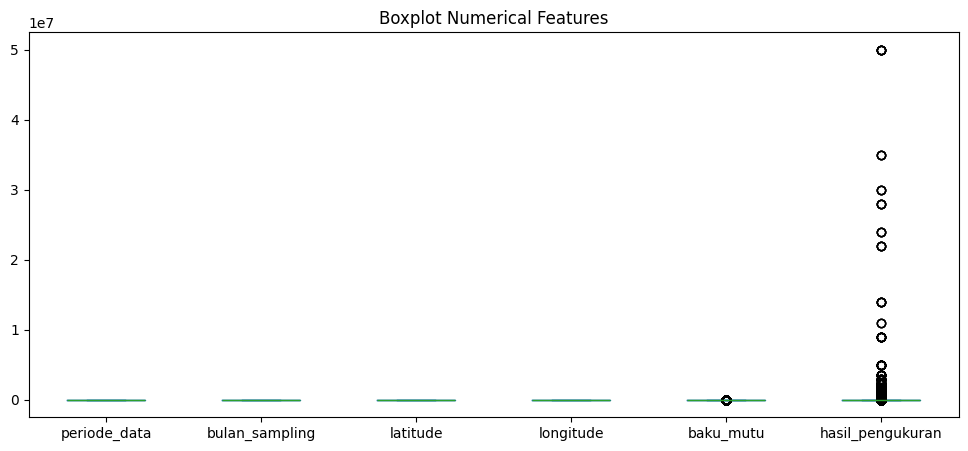

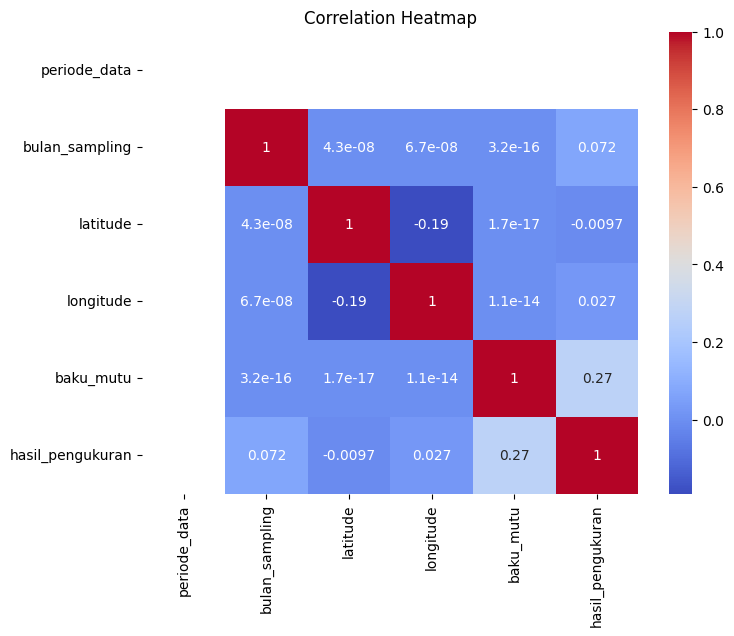

In [3]:
evaluate_dataset(
    df_kualitas_air,
    name="Kualitas Air Sungai"
)